In [83]:
import os
from os.path import expanduser
import socket
import sys


# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
if running_system == systemLOCAL:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"Documents","projects", "awi-models")
elif running_system[0:1] == "b" or running_system == systemHLRN:
    print "computer = ", running_system
    wd_path = os.path.join(my_home,"awi-models")
else:
    print 'please configure your local machine : type socket.gethostname()'
print "working directory set to", wd_path
os.chdir(wd_path)
sys.path.append("codes/modules")
#########################################

computer =  bfn1001
working directory set to /home/hbkoziel/awi-models


In [84]:
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# AUTOMATIC DEFINITION OF PATHS
datapath = wd_path+'/data/'
savepath    = wd_path+'/figures/insitu/'

In [86]:
#################
BSOfile = datapath+'BSO_nuts/BSO_nutrients_1980-2016_light.csv'
print BSOfile
df = pd.read_csv(BSOfile, header=0, sep = ';',na_values=[''], decimal=",", index_col='time', parse_dates=True)
df.head()

/home/hbkoziel/awi-models/data/BSO_nuts/BSO_nutrients_1980-2016_light.csv


,Cruise,Station,lon,lat,Bot_Depth,Depth,po,Si,N
time,,,,,,,,,
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,0.0,0.31,2.2,1.2
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,5.0,0.26,2.1,1.2
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,10.0,0.28,2.2,1.2
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,20.0,0.27,2.2,1.2
1980-06-22 11:00:00,1980005,558,20.0,70.5,129,30.0,0.27,2.2,1.3


In [94]:
df_monthly=df.resample('M').mean()
df_monthly.head()

,Station,lon,lat,Bot_Depth,Depth,po,Si,N
time,,,,,,,,
1980-06-30,566.687204,19.624728,72.234599,292.464455,92.748815,0.597156,3.440426,6.264762
1980-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df_monthly_deep = df_monthly[df_monthly.Depth >50]
df_monthly_deep.head()

,Station,lon,lat,Bot_Depth,Depth,po,Si,N
time,,,,,,,,
1980-06-30,566.687204,19.624728,72.234599,292.464455,92.748815,0.597156,3.440426,6.264762
1981-03-31,266.240741,19.598042,72.355338,290.467593,92.453704,0.609009,4.303704,8.395261
1981-05-31,380.955556,19.610732,72.295912,287.937778,92.711111,0.739361,5.574667,10.584889
1981-06-30,463.137168,19.604561,72.334808,288.654867,93.738938,0.505442,4.012389,6.058407
1982-03-31,240.465517,19.588129,72.397280,296.314655,94.331897,0.829138,5.608621,11.858874


In [92]:
df_winter_monthly_deep = df_monthly_deep[df_monthly_deep.index.month.isin([11,12,1,2,3,4])]
df_winter_monthly_alldepth = df_monthly[df_monthly.index.month.isin([11,12,1,2,3,4])]
df_winter_monthly_deep.head()

,Station,lon,lat,Bot_Depth,Depth,po,Si,N
time,,,,,,,,
1981-03-31,266.240741,19.598042,72.355338,290.467593,92.453704,0.609009,4.303704,8.395261
1982-03-31,240.465517,19.588129,72.397280,296.314655,94.331897,0.829138,5.608621,11.858874
1982-04-30,606.781022,19.609245,72.289537,248.744526,75.693431,0.750511,5.333577,10.514307
1984-01-31,10.376623,19.595224,72.375830,285.974026,92.112554,0.917874,5.694372,12.692982
1984-03-31,181.521739,19.576505,72.407898,277.357488,87.922705,1.014861,4.517391,12.980242


In [89]:
df_winter_deep = df_winter_monthly_deep.resample('Y').mean()
df_winter_alldepth = df_winter_monthly_alldepth.resample('Y').mean()
df_yearly_deep = df_monthly_deep.resample('Y').mean()
df_yearly_alldepth = df_monthly.resample('Y').mean()

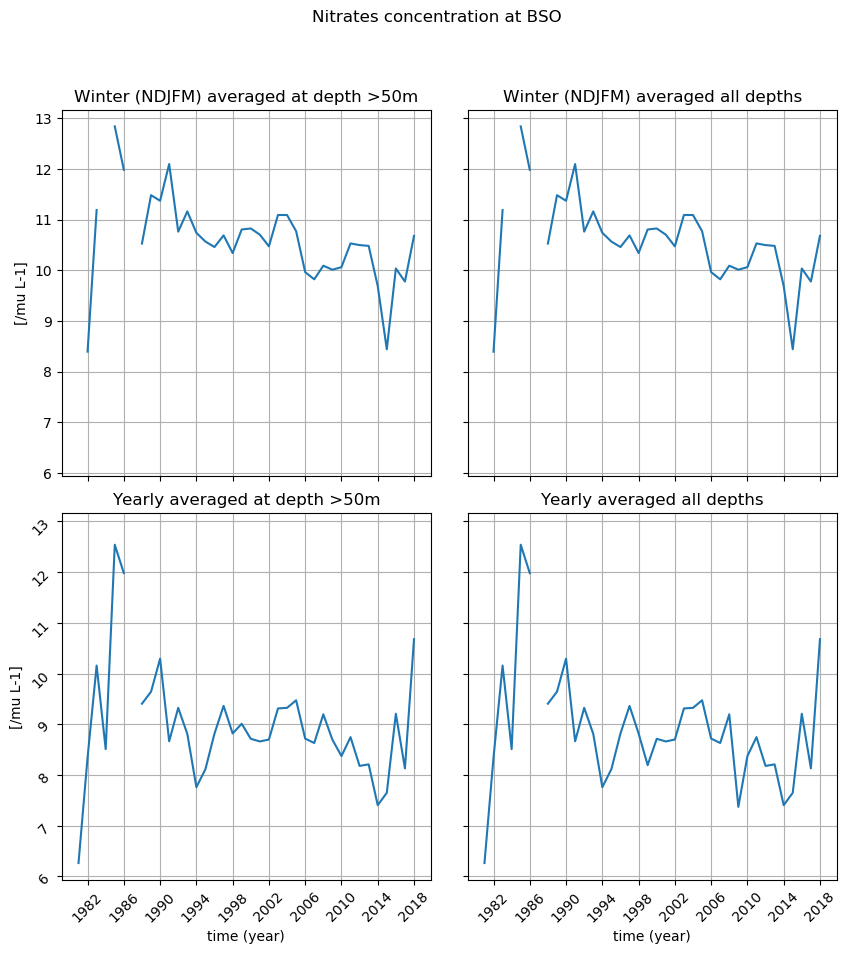

In [90]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1},figsize=(10, 10))
plt.style.use('default')
fig.suptitle('Nitrates concentration at BSO')

ax1.plot(df_winter_deep.N)
ax1.set_ylabel('[/mu L-1]')
ax1.grid(True)
#ax1.set_ylim(8,13)
ax1.title.set_text('Winter (NDJFM) averaged at depth >50m')


ax2.plot(df_winter_alldepth.N)
ax2.grid(True)
ax2.title.set_text('Winter (NDJFM) averaged all depths')

ax3.plot(df_yearly_deep.N)
ax3.set_xlabel('time (year)')
ax3.set_ylabel('[/mu L-1]')
ax3.tick_params(labelrotation=45)
ax3.grid(True)
ax3.title.set_text('Yearly averaged at depth >50m')

ax4.plot(df_yearly_alldepth.N)
ax4.set_xlabel('time (year)')
ax4.tick_params(labelrotation=45)
ax4.grid(True)
ax4.title.set_text('Yearly averaged all depths')

plt.savefig(savepath+'BSO_nitrates.png', dpi = 150, bbox_inches='tight') 
      

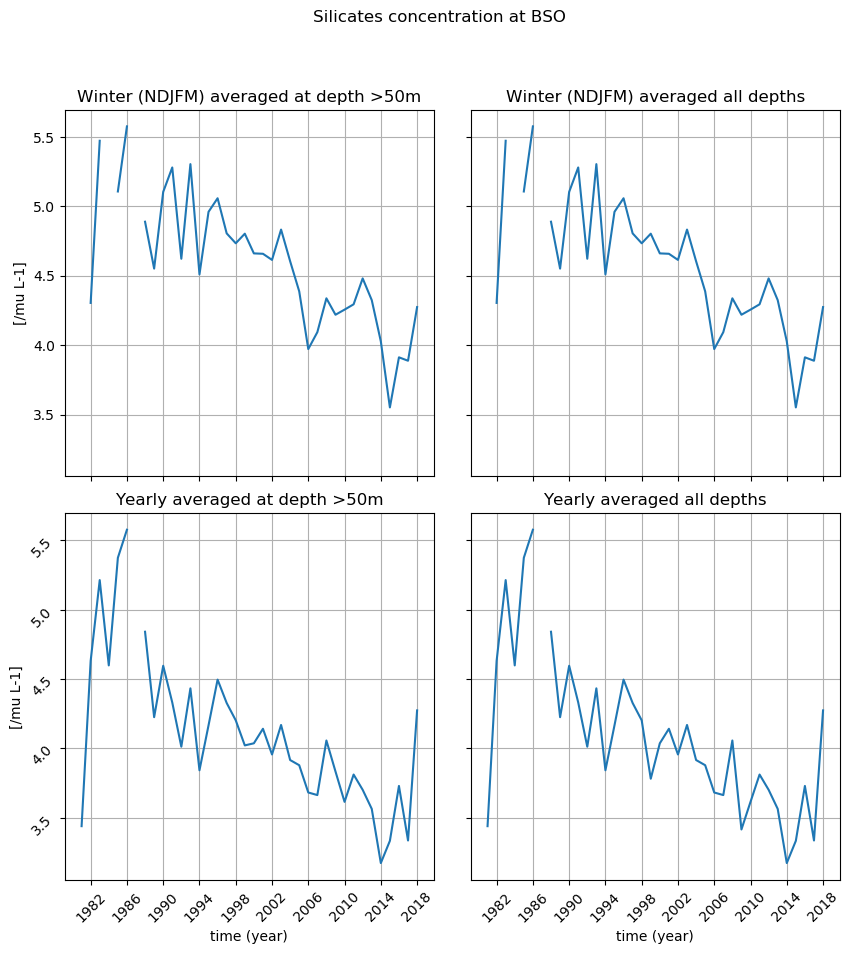

In [91]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True,
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1},figsize=(10, 10))
plt.style.use('default')
fig.suptitle('Silicates concentration at BSO')

ax1.plot(df_winter_deep.Si)
ax1.set_ylabel('[/mu L-1]')
ax1.grid(True)
#ax1.set_ylim(8,13)
ax1.title.set_text('Winter (NDJFM) averaged at depth >50m')


ax2.plot(df_winter_alldepth.Si)
ax2.grid(True)
ax2.title.set_text('Winter (NDJFM) averaged all depths')

ax3.plot(df_yearly_deep.Si)
ax3.set_xlabel('time (year)')
ax3.set_ylabel('[/mu L-1]')
ax3.tick_params(labelrotation=45)
ax3.grid(True)
ax3.title.set_text('Yearly averaged at depth >50m')

ax4.plot(df_yearly_alldepth.Si)
ax4.set_xlabel('time (year)')
ax4.tick_params(labelrotation=45)
ax4.grid(True)
ax4.title.set_text('Yearly averaged all depths')

plt.savefig(savepath+'BSO_silicates.png', dpi = 150, bbox_inches='tight') 
      